## **Dataset Loading and Exploration**
- Dataset loading and initial inspection
- Data quality assessment and completeness analysis
- Exploratory data analysis including correlation matrix
- Feature scaling and data preparation for clustering

### Preloading necessary libraries

In [14]:
import pandas as pd # DataFrame creation
import matplotlib.pyplot as plt # Visualizations
import seaborn as sns # Visualizations

from sklearn.preprocessing import StandardScaler # Preprocessing - Scaling

### Loading dataset

In [3]:
# Loading dataset
path = 'https://raw.githubusercontent.com/JustGlowing/minisom/refs/heads/master/examples/democracy_index.csv'
df = pd.read_csv(path)

# Displaying first 5 rows
df.head()

,Unnamed: 0,rank,country,democracy_index,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties,category
0,0,1,Norway,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy
1,1,2,Iceland,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy
2,2,3,Sweden,9.39,9.58,9.64,8.33,10.00,9.41,Full democracy
3,3,4,New Zealand,9.26,10.00,9.29,8.89,8.13,10.00,Full democracy
4,4,5,Denmark,9.22,10.00,9.29,8.33,9.38,9.12,Full democracy


### Exploring dataset

In [4]:
# Shape of dataset
print('Size of dataset: \n', df.shape)

# Column names and data types
print('\n Column names & data types: \n', df.dtypes)

# Checking for missing values
print('\n No null values found')
print(df.isnull().sum()) # No Null values found

Size of dataset: 
 (167, 10)

 Column names & data types: 
 Unnamed: 0                          int64
rank                               object
country                            object
democracy_index                   float64
electoral_processand_pluralism    float64
functioning_of_government         float64
political_participation           float64
political_culture                 float64
civil_liberties                   float64
category                           object
dtype: object

 No null values found
Unnamed: 0                        0
rank                              0
country                           0
democracy_index                   0
electoral_processand_pluralism    0
functioning_of_government         0
political_participation           0
political_culture                 0
civil_liberties                   0
category                          0
dtype: int64


#### Dataset demonstrates high completeness with zero missing values across all 167 countries and 5 democracy dimensions, providing a robust foundation for clustering analysis.

### Data Preparation for Clustering
Filtering data to show 5 categories

In [5]:
data_df=df.drop(columns=['democracy_index','rank','country','Unnamed: 0','category'])
data_df.head()

,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties
0,10.00,9.64,10.00,10.00,9.71
1,10.00,9.29,8.89,10.00,9.71
2,9.58,9.64,8.33,10.00,9.41
3,10.00,9.29,8.89,8.13,10.00
4,10.00,9.29,8.33,9.38,9.12


Before scaling data, we need to look at the dataset properties to determine if scaling is needed.


In [6]:
data_df.describe()

,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties
count,167.000000,167.000000,167.00000,167.000000,167.000000
mean,5.902934,4.884671,5.24976,5.593952,5.768263
std,3.540180,2.522545,1.87654,1.647974,2.676157
min,0.000000,0.000000,1.11000,1.250000,0.000000
25%,3.000000,2.860000,3.89000,4.380000,3.530000
50%,6.580000,5.000000,5.56000,5.630000,5.880000
75%,9.170000,6.790000,6.67000,6.250000,8.240000
max,10.000000,9.640000,10.00000,10.000000,10.000000


Statistical analysis reveals different variance patterns and ranges across democracy variables, requiring standardization to ensure equal algorithmic weighting during clustering.

Scaling will need to be performed so that all values in the dataset will be weighed equally and it allows for the algorithm to provide a more accurate response.

### Statistical Summary

In [7]:
# Statistical summary of democracy variables
print("Statistical Summary of Democracy Variables:")
df.describe()

# Democracy regime distribution
print("\nCountry Distribution by Democracy Category:")
print(df['category'].value_counts())

# Data range validation
print("\nData Range Validation:")
democracy_cols = ['electoral_processand_pluralism', 'functioning_of_government', 
                 'political_participation', 'political_culture', 'civil_liberties']
for col in democracy_cols:
    print(f"{col}: {df[col].min():.2f} - {df[col].max():.2f}")

Statistical Summary of Democracy Variables:

Country Distribution by Democracy Category:
category
Flawed democracy    55
Authoritarian       53
Hybrid regime       39
Full democracy      20
Name: count, dtype: int64

Data Range Validation:
electoral_processand_pluralism: 0.00 - 10.00
functioning_of_government: 0.00 - 9.64
political_participation: 1.11 - 10.00
political_culture: 1.25 - 10.00
civil_liberties: 0.00 - 10.00


### Correlation Analysis

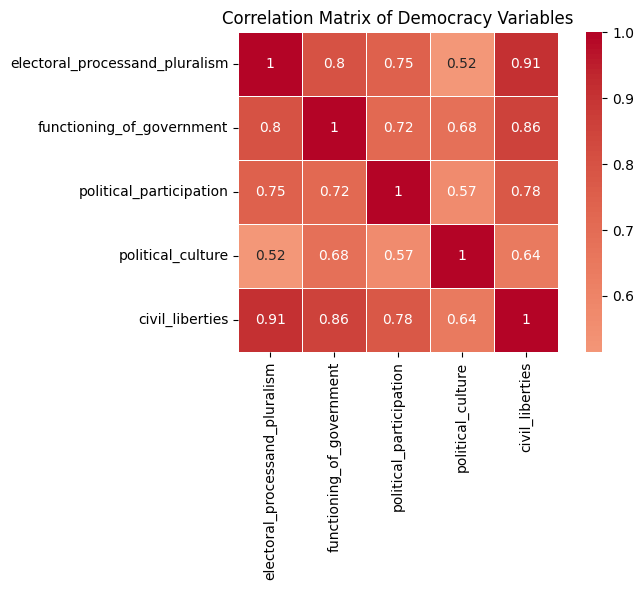

In [11]:
# Correlation analysis
plt.figure(figsize=(8, 6))
sns.heatmap(data_df.corr(), annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Democracy Variables')
plt.tight_layout()
plt.show()

The correlation analysis reveals that democracy variables are moderately to highly correlated (0.52-0.91), indicating they measure related but distinct aspects of governance. This supports the inclusion of all five dimensions in the clustering analysis, as each provides unique information about countries' political risk profiles while maintaining sufficient independence to avoid redundancy.

In [15]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to democracy variables
scaled_data = scaler.fit_transform(data_df)
scaled_df = pd.DataFrame(scaled_data, columns=data_df.columns)

# Validate scaling worked
print("Scaling validation:")
print("Original data ranges:")
for col in data_df.columns:
    print(f"{col}: {data_df[col].min():.2f} - {data_df[col].max():.2f}")

print("\nScaled data ranges:")
for col in scaled_df.columns:
    print(f"{col}: {scaled_df[col].min():.2f} - {scaled_df[col].max():.2f}")

Scaling validation:
Original data ranges:
electoral_processand_pluralism: 0.00 - 10.00
functioning_of_government: 0.00 - 9.64
political_participation: 1.11 - 10.00
political_culture: 1.25 - 10.00
civil_liberties: 0.00 - 10.00

Scaled data ranges:
electoral_processand_pluralism: -1.67 - 1.16
functioning_of_government: -1.94 - 1.89
political_participation: -2.21 - 2.54
political_culture: -2.64 - 2.68
civil_liberties: -2.16 - 1.59
